# 3. Explorative Datenanalyse

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('/Users/cenkyagkan/books/mynewbook/content/dataset_leasingrisk.csv')

In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,einkommen_025,label
0,Male,No,0,Graduate,No,5849,0,36,Urban,65318.400,680.400000,1462.25,No Risk
1,Male,Yes,1,Graduate,No,4583,1508,36,Rural,65318.400,680.400000,1145.75,No Risk
2,Male,Yes,0,Graduate,Yes,3000,0,36,Urban,48498.912,505.197000,750.00,No Risk
3,Male,Yes,0,Not Graduate,No,2583,2358,36,Urban,61236.000,637.875000,645.75,No Risk
4,Male,No,0,Graduate,No,6000,0,36,Urban,71952.300,749.503125,1500.00,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,Male,Yes,0,Graduate,No,3232,1950,36,Rural,55112.400,574.087500,808.00,No Risk
554,Female,No,0,Graduate,No,2900,0,36,Rural,60385.500,629.015625,725.00,No Risk
555,Male,Yes,1,Graduate,No,8072,240,36,Urban,46478.124,484.147125,2018.00,No Risk
556,Male,Yes,2,Graduate,No,7583,0,36,Urban,57255.660,596.413125,1895.75,No Risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             558 non-null    object 
 1   Married            558 non-null    object 
 2   Dependents         558 non-null    object 
 3   Education          558 non-null    object 
 4   Self_Employed      558 non-null    object 
 5   ApplicantIncome    558 non-null    int64  
 6   CoapplicantIncome  558 non-null    int64  
 7   Loan_Amount_Term   558 non-null    int64  
 8   Property_Area      558 non-null    object 
 9   Fahrzeugwert       558 non-null    float64
 10  leasingrate        558 non-null    float64
 11  einkommen_025      558 non-null    float64
 12  label              558 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 56.8+ KB


- Von den kategorischen Features müssen Datentypen angepasst werden.
- Es gibt keine Missing Values

## Data preparation

### Change dtype

In [5]:
df = df.astype({"Gender": 'category', "Married": 'category', "Dependents": 'category', "Education": 'category', "Self_Employed": 'category', "Loan_Amount_Term": 'int64', "Property_Area": 'category', "label": 'category'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             558 non-null    category
 1   Married            558 non-null    category
 2   Dependents         558 non-null    category
 3   Education          558 non-null    category
 4   Self_Employed      558 non-null    category
 5   ApplicantIncome    558 non-null    int64   
 6   CoapplicantIncome  558 non-null    int64   
 7   Loan_Amount_Term   558 non-null    int64   
 8   Property_Area      558 non-null    category
 9   Fahrzeugwert       558 non-null    float64 
 10  leasingrate        558 non-null    float64 
 11  einkommen_025      558 non-null    float64 
 12  label              558 non-null    category
dtypes: category(7), float64(3), int64(3)
memory usage: 31.0 KB


In [7]:
# Entfernung von einkommen_025, da es nur bei der Datensatzerstellung benötigt wurde.
df = df.drop('einkommen_025', axis=1)

### Überprüfung der einzelnen Features

In [10]:
cols = df.columns.to_list()

In [17]:
for col in cols:
    print(col)
    print(df[col].value_counts())
    print('\n')

Gender
Male      451
Female    107
Name: Gender, dtype: int64


Married
Yes    357
No     201
Name: Married, dtype: int64


Dependents
0     336
2      92
1      88
3+     42
Name: Dependents, dtype: int64


Education
Graduate        443
Not Graduate    115
Name: Education, dtype: int64


Self_Employed
No     484
Yes     74
Name: Self_Employed, dtype: int64


ApplicantIncome
2500    9
4583    6
2600    6
6000    6
3750    5
       ..
3975    1
3244    1
4408    1
3917    1
7583    1
Name: ApplicantIncome, Length: 461, dtype: int64


CoapplicantIncome
0       247
1666      5
2083      5
2500      5
1750      3
       ... 
1083      1
3021      1
983       1
1775      1
240       1
Name: CoapplicantIncome, Length: 261, dtype: int64


Loan_Amount_Term
36    526
48     15
30     13
24      4
Name: Loan_Amount_Term, dtype: int64


Property_Area
Semiurban    218
Urban        174
Rural        166
Name: Property_Area, dtype: int64


Fahrzeugwert
65318.400    30
61236.000    27
48988.800    21


- Es gibt keine Fehler bzw. Inkonsistenzen in den Daten.
- Das Label "No Riks" ist überpräsentiert in Daten -> Somit handelt es sich um einen imbalanced dataset. So kann man dieser Stelle auf eine Sampling Methode zurückgreifen.
- Ich werde hierzu später die Methode SMOTE (Synthetic Minority Oversampling Technique) verwenden, um mehr Instanzen von der unterpräsentierten Gruppe zu erzeugen.

<AxesSubplot:xlabel='label', ylabel='count'>

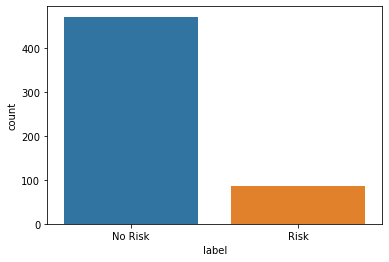

In [20]:
sns.countplot(x="label", data=df)

### Deskriptive Statistik

In [22]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Fahrzeugwert,leasingrate
count,558.000000,558.000000,558.000000,558.000000,558.000000
mean,5316.265233,1557.268817,36.096774,58340.490213,607.713440
std,5666.461317,2485.460788,2.396427,8396.930283,87.468024
min,150.000000,0.000000,24.000000,43885.800000,457.143750
25%,2873.500000,0.000000,36.000000,51030.000000,531.562500
50%,3815.000000,1239.500000,36.000000,57439.368000,598.326750
75%,5771.500000,2252.250000,36.000000,65318.400000,680.400000
max,81000.000000,33837.000000,48.000000,76034.700000,792.028125


**ApplicantIncome:**
- 25% der Personen haben Einkommen unterhalb von 2873,50
- 50% der Personen haben Einkommen unterhalb von 3815,00
- 75% der Personen haben Einkommen unterhalb von 5771,50
- Das durchschnittliche Gehalt liegt bei 5316,26
- Auffällig ist, dass das niedrgiste Gehalt nur bei 150 liegt. -> Muss näher betrachtet werden

**CoapplicantIncome**
- Der Zweitverdiener bzw. Lebenspartner hat ein geringes Einkommen im Vergleich zum Hauptverdiener.

**Loan_Amount_Term**
- Im Durschnitt wird ein Fahrzeug für 36 Monate geleast.

**Fahrzeugwert und Leasingrat**
- Durchschnittlich haben die Fahrzeuge einen Wert von 58340 und eine Leasingrate von 607.

### Verteilung der Features

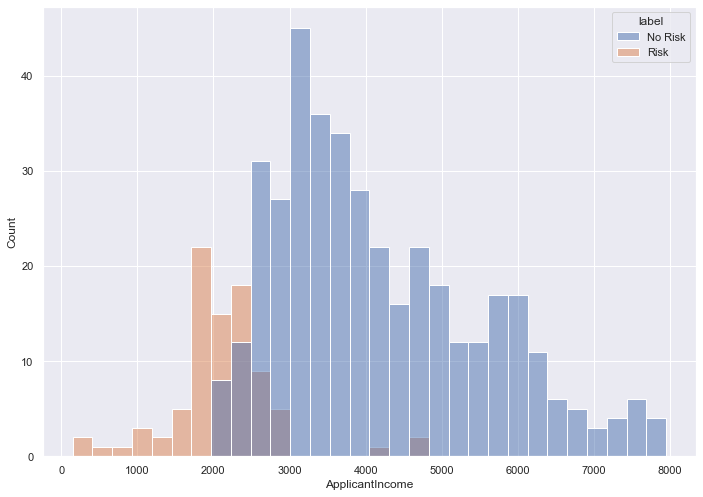

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_low_income = df[df['ApplicantIncome'] < 8000]
sns.histplot(x= 'ApplicantIncome', hue="label", data=df_low_income, bins=30);

- Man kann deutlich erkennen, dass vor allem die Personen die einen Gehalt unter 3000 haben, die Leasingrate nicht bezahlen können und somit für Mercedes Benz ein Risiko darstellen.

In [50]:
df[(df.ApplicantIncome > 3900) & (df.label == 'Risk')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,label
43,Male,Yes,0,Not Graduate,Yes,4695,0,36,Urban,48988.80,510.30000,Risk
207,Male,Yes,0,Not Graduate,Yes,4735,0,36,Urban,70421.40,733.55625,Risk
254,Male,No,1,Not Graduate,Yes,4053,2426,36,Urban,48376.44,503.92125,Risk


- Bei den Personen, die ein Einkommen über 4000 haben und trotzdem als Risiko eingestuft wurden, handelt es sich um Selbstständige.

In [34]:
df[df['ApplicantIncome'] < 1500].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,label
27,Male,No,0,Not Graduate,No,1442,0,36,Urban,71442.00,744.187500,Risk
73,Male,Yes,1,Graduate,Yes,1000,3022,36,Urban,56133.00,584.718750,Risk
78,Female,Yes,2,Graduate,No,1378,1881,36,Urban,51132.06,532.625625,Risk
171,Male,Yes,0,Graduate,Yes,674,5296,36,Rural,51438.24,535.815000,Risk
197,Male,Yes,0,Graduate,No,150,1800,36,Rural,68890.50,717.609375,Risk


- Bei den Personen die weniger als 1500 verdienen, kann man erkennen, dass der Zweitverdiener dafür ein höheres Einkommen hat.

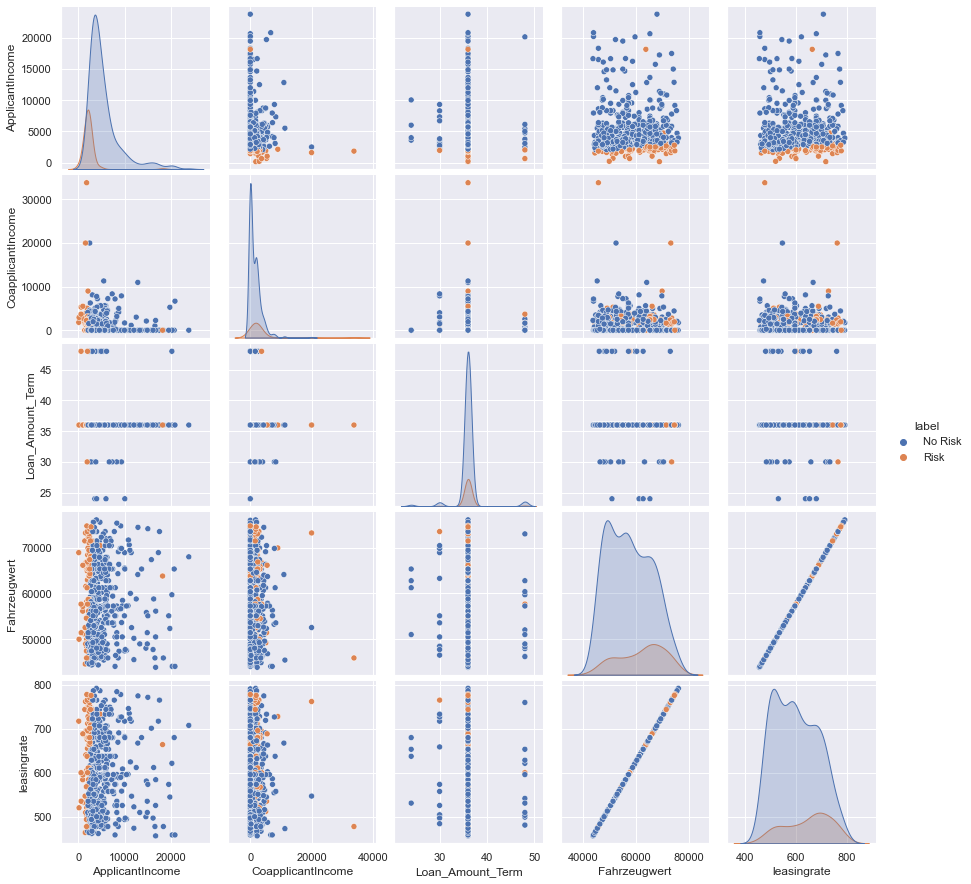

In [35]:
df_normal_income = df[df['ApplicantIncome'] < 25000]
sns.pairplot(hue="label", data=df_normal_income);

- Da der Datensatz mit einfachen Bedingungen erstellt wurde, kann man erkennen, das bei der Erstellung des Labels auch Noise entstanden ist, wie bei dem Plot unten links (ApplicantIncome / leasungrate)

### Entfernung von Noise

In [37]:
df[(df.ApplicantIncome > 15000) & (df.leasingrate > 600) & (df.label == 'Risk')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,label
489,Female,No,0,Not Graduate,Yes,18165,0,36,Urban,63787.5,664.453125,Risk


In [40]:
df = df.drop([489])
df[(df.ApplicantIncome > 15000) & (df.leasingrate > 600) & (df.label == 'Risk')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,label


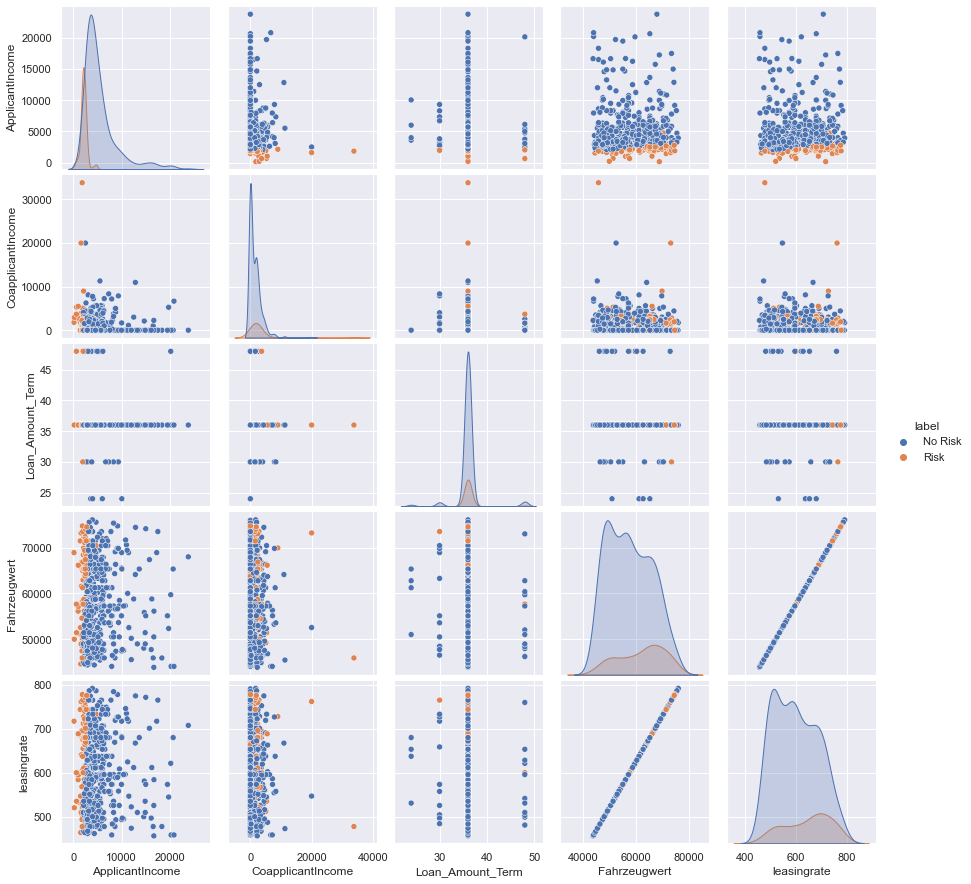

In [46]:
df_normal_income = df[df['ApplicantIncome'] < 25000]
sns.pairplot(hue="label", data=df_normal_income);

- Auch im Pairplot kann man erkennen, dass vor allem Personen mit einem geringem Einkommen ein Risiko darstellen, dass die Leasingraten nicht bezhalt werden können.

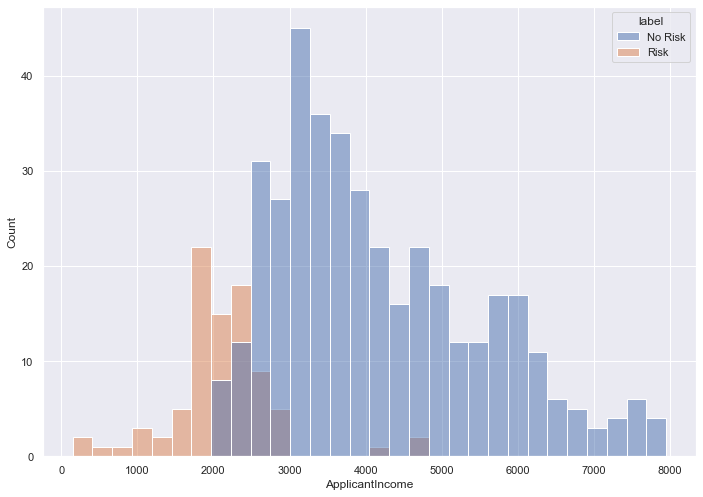

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_low_income = df[df['ApplicantIncome'] < 8000]
sns.histplot(x= 'ApplicantIncome', hue="label", data=df_low_income, bins=30);

In [49]:
df[(df.ApplicantIncome > 3900) & (df.label == 'Risk')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,label
43,Male,Yes,0,Not Graduate,Yes,4695,0,36,Urban,48988.80,510.30000,Risk
207,Male,Yes,0,Not Graduate,Yes,4735,0,36,Urban,70421.40,733.55625,Risk
254,Male,No,1,Not Graduate,Yes,4053,2426,36,Urban,48376.44,503.92125,Risk


### Korrelation

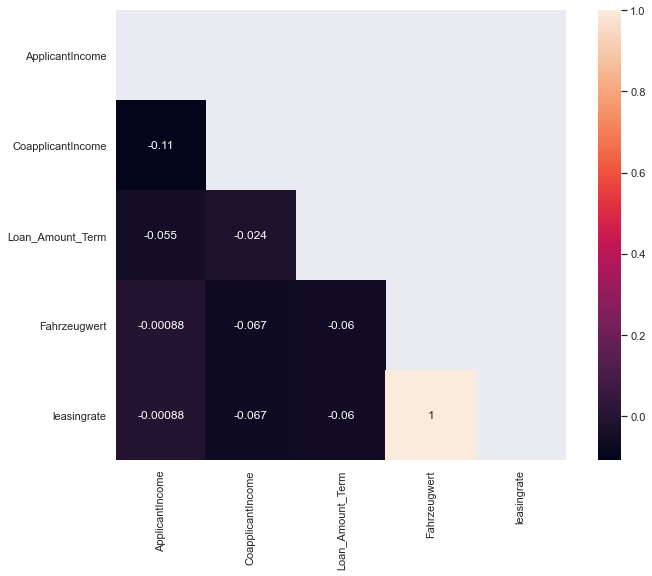

In [51]:
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix, annot = True, square= True);

- Es besteht keine Korrelation unter den Features
- Außer bei Farhzeugwert und Leasingrate, da hier die Leasingrate auf Basis des Fahrzeugwertes berechnet wurde.
- Auch bei der logistischen Regression sollte keine Multikollinearität vorliegen, dies gilt es noch zusätzlich mit dem Varianzinflationsfaktor zu prüfen.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Fahrzeugwert', 'leasingrate']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

             feature        VIF
0    ApplicantIncome   1.884537
1  CoapplicantIncome   1.404571
2   Loan_Amount_Term  40.058810
3       Fahrzeugwert        inf
4        leasingrate        inf


/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


- Da der Fahrzeugwert mit der Leasingrate korreliert, werde ich das Feature "Fahrzeugwert" beim Modelbulidng mal entfernen und mal mitaufnehmen.

In [53]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,label
0,Male,No,0,Graduate,No,5849,0,36,Urban,65318.400,680.400000,No Risk
1,Male,Yes,1,Graduate,No,4583,1508,36,Rural,65318.400,680.400000,No Risk
2,Male,Yes,0,Graduate,Yes,3000,0,36,Urban,48498.912,505.197000,No Risk
3,Male,Yes,0,Not Graduate,No,2583,2358,36,Urban,61236.000,637.875000,No Risk
4,Male,No,0,Graduate,No,6000,0,36,Urban,71952.300,749.503125,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...
553,Male,Yes,0,Graduate,No,3232,1950,36,Rural,55112.400,574.087500,No Risk
554,Female,No,0,Graduate,No,2900,0,36,Rural,60385.500,629.015625,No Risk
555,Male,Yes,1,Graduate,No,8072,240,36,Urban,46478.124,484.147125,No Risk
556,Male,Yes,2,Graduate,No,7583,0,36,Urban,57255.660,596.413125,No Risk


In [54]:
# Export csv
df.to_csv("/Users/cenkyagkan/books/mynewbook/content/df_leasingrisk_final_clean"+ ".csv", index=False)